In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from PIL import Image

In [9]:
def kmeans(img_1d, k_clusters, max_iter = 300, init_centroids='random'):   
    height_width , channels = img_1d.shape

    # Check the init centroids
    if init_centroids == 'random':
        centroids = np.random.randint(0, 256, (k_clusters, channels)) 
    elif init_centroids == 'in_pixels':
        rand_centroid = np.random.choice(range(height_width), k_clusters, replace = False)
        centroids = img_1d[rand_centroid]
    else:
        raise ValueError("Invalid option: 'random' or 'in_pixels'")
    for _ in range(max_iter):
        # Calculating distances between pixels and centroid
        distances = np.linalg.norm(img_1d[:, np.newaxis] - centroids, axis = 2) #2D array

        # Determine which pixel for which centroids
        labels = np.argmin(distances, axis = 1) #1D array to return the min index found of the 2D distances array

        # Calculate centroids by taking the mean of pixels is assigned 
        temp_centroids = np.array([np.mean(img_1d[labels == k] if np.any(labels == k) else centroids, axis = 0) for k in range(k_clusters)])
        
        # The centroids don't change or change a little bit then break the loop
        if np.allclose(centroids, temp_centroids):
            break
    
        centroids = temp_centroids
    
    return centroids, labels
# From centroids and labels to compressed image
def centroids_to_image(centroids, labels, img_shape):
    new_img = centroids[labels]
    new_img = new_img.reshape(img_shape)
    return new_img



In [10]:
# Take input from user
def user_input():
    img_name = input('Image name: ')
    k_clusters = int(input('Numbers of clusters: '))
    max_iter = int(input('Max iterator: '))
    init_centroids = input("Init centroids (random or in_pixels): ")
    file_extension  = input("Image output extension (jpg or pdf): ")
    
    return img_name, k_clusters, max_iter, init_centroids, file_extension

In [11]:
# pre-process for image
def img_process(img_name):
    img = mpl.image.imread(img_name)
    img_array = np.array(img)
    return img_array.reshape(-1, 3), img.shape

In [12]:
def export_img(new_img, file_extension):
    plt.imshow(new_img.astype(np.uint8))
    if file_extension == 'pdf':
    # Save as PDF
        plt.savefig('output.pdf', format='pdf')
    elif file_extension == 'jpg':
    # Save as JPG with custom DPI
        plt.savefig('output.jpg', format='jpg', dpi=300)
    plt.axis('off')
    plt.show()

In [13]:
def main():
    img_name, k_clusters, max_iter, init_centroids, file_extension = user_input()
    img_1d, img_shape = img_process(img_name)
    centroids, labels = kmeans(img_1d, k_clusters, max_iter, init_centroids)
    new_img = centroids_to_image(centroids, labels, img_shape)
    export_img(new_img, file_extension)
    

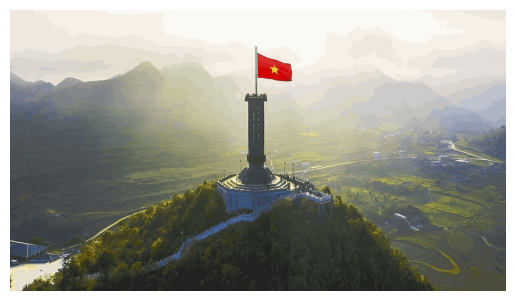

In [14]:
main()